In [41]:

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


In [42]:
df=pd.read_csv('ukrainefinal_lemmatized.csv')

In [43]:
df1=pd.read_csv('annotated_tweets_ukraine_lemmatized.csv')

In [44]:
df

,Unnamed: 0,date,Tweet,id
0,0,2022-02-24 00:01:49+00:00,russia ukraine war uşarusya ukrayna savaş abda...,1.496636e+18
1,1,2022-02-24 00:09:13+00:00,🇺🇦 🇷🇺 ukrayna ş o göndermek talep etmek,1.496638e+18
2,2,2022-02-24 00:10:06+00:00,abd dışiş bakmak yardım ceset torba moskova ge...,1.496639e+18
3,3,2022-02-24 00:12:33+00:00,şimdi anadil rusça olmak ukrayna ukraince yaza...,1.496639e+18
4,4,2022-02-24 00:39:51+00:00,ukrayna ge uyumak,1.496646e+18
...,...,...,...,...
35067,35067,2022-08-23 21:52:43+00:00,almanya ukrayna mülteci sayı açık,1.562196e+18
35068,35068,2022-08-23 21:53:25+00:00,te pavlov evin sovyet anavatan savunu toplantı...,1.562196e+18
35069,35069,2022-08-23 22:21:28+00:00,maalesef geç kalmak yer suriye ukrayna doldurm...,1.562203e+18
35070,35070,2022-08-23 22:21:51+00:00,trabzon havaî fişek uzak gören ukrayna,1.562203e+18


In [45]:
vector=CountVectorizer()

In [46]:
X=df['Tweet']

In [47]:
X_train=df1['Tweet']

In [48]:
X_train=vector.fit_transform(X_train)

In [49]:
X_pred=df['Tweet']

In [50]:
X_pred=vector.transform(X_pred)

In [51]:
ytrain=df1['Sentiment']

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, ytrain)
ypred = log_reg.predict(X_pred)


In [53]:
ypred

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [54]:
df2 = pd.concat([X.reset_index(drop=True), pd.Series(ypred, name="PredictedSentiment")], axis=1)

In [67]:
df5['PredictedSentiment'].value_counts()

Neutral     30701
Positive     3042
Negative     1329
Name: PredictedSentiment, dtype: int64

In [56]:
df2.to_csv('predictedsentiment_ukraine.csv')

In [57]:
all_tweets_ukraine=pd.read_excel('ukrainefinaldataset.xlsx')

In [58]:
all_tweets_ukraine

,date,Tweet,id
0,2022-02-24 00:01:49+00:00,#Russia #Ukraine #War #USA\n#Rusya #Ukrayna #S...,1.496636e+18
1,2022-02-24 00:09:13+00:00,🇺🇦 🇷🇺 Ukraynalılar S-400'leri onlara göndermem...,1.496638e+18
2,2022-02-24 00:10:06+00:00,"ABD Dışişleri Bakan Yardımcısı: ""Ceset torbala...",1.496639e+18
3,2022-02-24 00:12:33+00:00,Şimdi anadili #Rusça olan #Ukraynalılar #Ukrai...,1.496639e+18
4,2022-02-24 00:39:51+00:00,Ukraynalılar bu gece uyumuyor.,1.496646e+18
...,...,...,...
35067,2022-08-23 21:52:43+00:00,Almanya'daki Ukraynalı Mülteci Sayısı Açıkland...,1.562196e+18
35068,2022-08-23 21:53:25+00:00,1983'te Pavlov evinde Sovyetler Anavatan savun...,1.562196e+18
35069,2022-08-23 22:21:28+00:00,@ulkeinceleme Maalesef geç kaldınız o yerleri ...,1.562203e+18
35070,2022-08-23 22:21:51+00:00,trabzondaki havai fişekleri uzaktan gören ukra...,1.562203e+18


In [59]:
df5 = pd.concat([all_tweets_ukraine.reset_index(drop=True), pd.Series(ypred, name="PredictedSentiment")], axis=1)

In [60]:
df5

,date,Tweet,id,PredictedSentiment
0,2022-02-24 00:01:49+00:00,#Russia #Ukraine #War #USA\n#Rusya #Ukrayna #S...,1.496636e+18,Neutral
1,2022-02-24 00:09:13+00:00,🇺🇦 🇷🇺 Ukraynalılar S-400'leri onlara göndermem...,1.496638e+18,Neutral
2,2022-02-24 00:10:06+00:00,"ABD Dışişleri Bakan Yardımcısı: ""Ceset torbala...",1.496639e+18,Neutral
3,2022-02-24 00:12:33+00:00,Şimdi anadili #Rusça olan #Ukraynalılar #Ukrai...,1.496639e+18,Neutral
4,2022-02-24 00:39:51+00:00,Ukraynalılar bu gece uyumuyor.,1.496646e+18,Neutral
...,...,...,...,...
35067,2022-08-23 21:52:43+00:00,Almanya'daki Ukraynalı Mülteci Sayısı Açıkland...,1.562196e+18,Neutral
35068,2022-08-23 21:53:25+00:00,1983'te Pavlov evinde Sovyetler Anavatan savun...,1.562196e+18,Positive
35069,2022-08-23 22:21:28+00:00,@ulkeinceleme Maalesef geç kaldınız o yerleri ...,1.562203e+18,Neutral
35070,2022-08-23 22:21:51+00:00,trabzondaki havai fişekleri uzaktan gören ukra...,1.562203e+18,Neutral


In [61]:
df5.to_csv('ukrainewithpredictedsentiment.csv')

In [62]:
df5.to_excel('ukrainewithpredictedsentiment.xlsx')

In [63]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

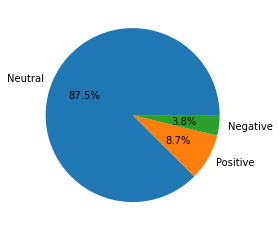

In [66]:
plt.pie(df5['PredictedSentiment'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%1.1f%%')
plt.show()